In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
df = df[(df.ocean_proximity == 'INLAND') | (df.ocean_proximity == '<1H OCEAN')]

In [58]:
df.drop(columns='ocean_proximity', inplace=True)

In [59]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [60]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,15687.0,-119.217442,1.780380,-124.1400,-124.1400,-121.900,-121.0700,-118.3700,-117.9900,-117.37000,-117.07000,-116.077200,-114.3100
latitude,15687.0,35.467307,2.066387,32.6100,32.6100,33.750,33.9400,34.1600,37.3400,38.59000,39.12000,40.570000,41.9500
housing_median_age,15687.0,27.188118,12.057128,1.0000,1.0000,11.000,17.0000,27.0000,36.0000,43.00000,48.00000,52.000000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,2.0000,937.000,1441.0000,2118.0000,3172.0000,4773.00000,6386.50000,11637.660000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,2.0000,197.000,295.0000,432.0000,645.0000,976.00000,1300.00000,2292.710000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,3.0000,519.000,802.0000,1195.0000,1777.0000,2654.40000,3426.70000,6015.080000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,2.0000,182.600,278.0000,406.0000,602.0000,902.00000,1189.00000,2038.280000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,0.4999,1.875,2.5208,3.4688,4.6862,6.08164,7.11438,10.358868,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,14999.0000,74800.000,111300.0000,166900.0000,241100.0000,347700.00000,440900.00000,500001.000000,500001.0000


In [61]:
int_columns = list(df.dtypes[df.dtypes=='float'].index)

/tmp/ipykernel_122866/2497528317.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax=ax, layout=(3,3), column=int_columns)


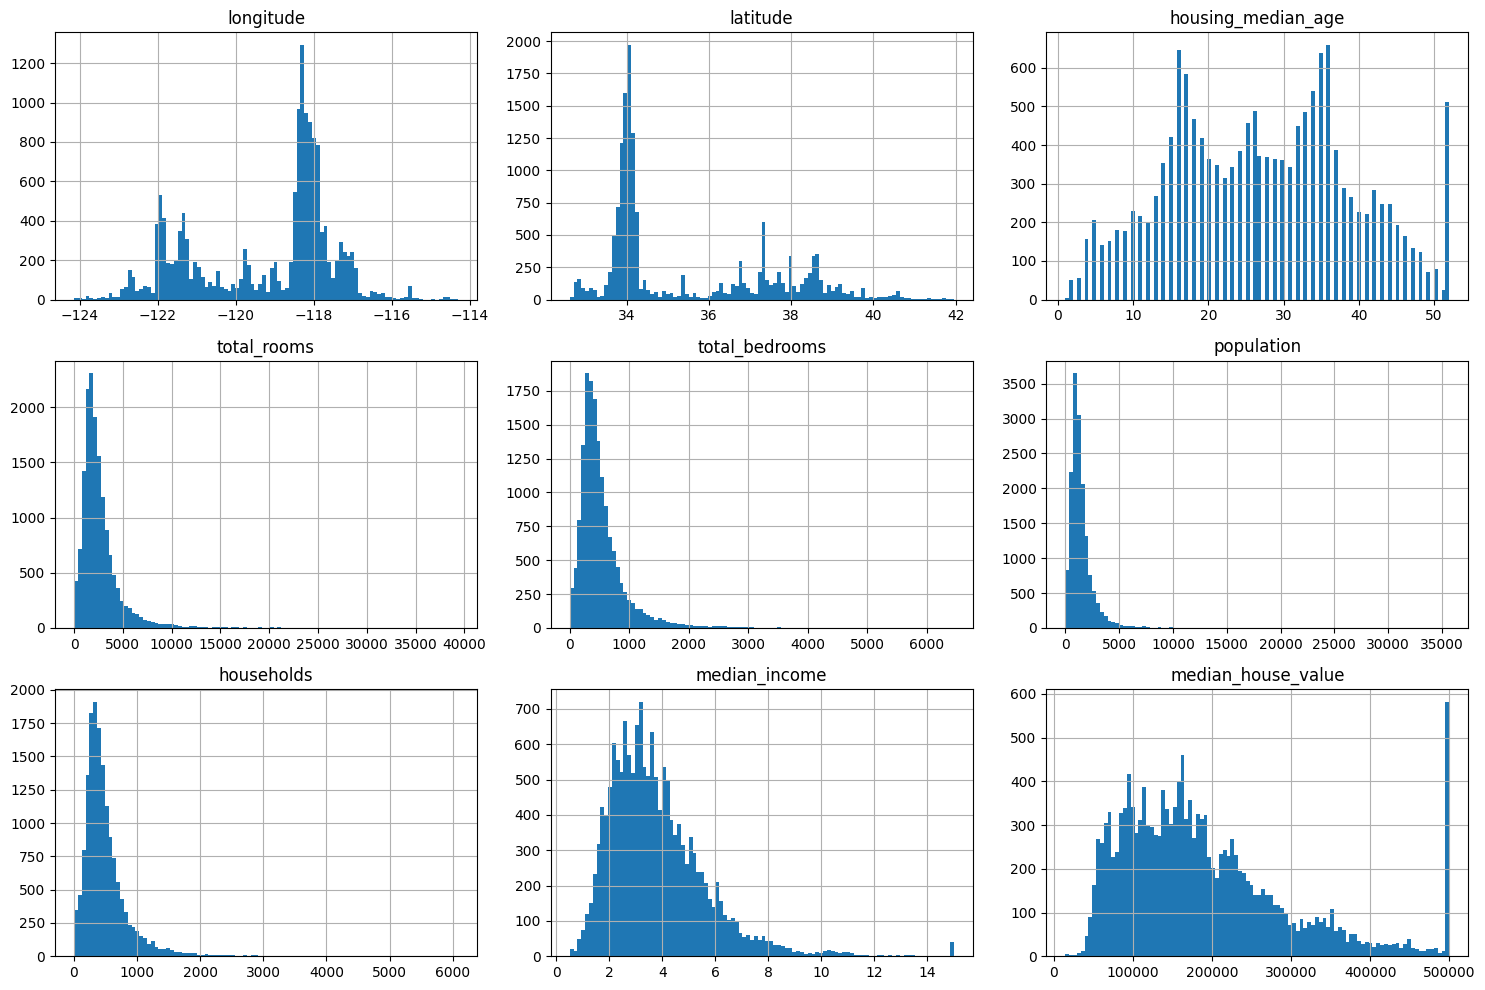

In [62]:
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3,3), column=int_columns)
plt.tight_layout()
plt.show()

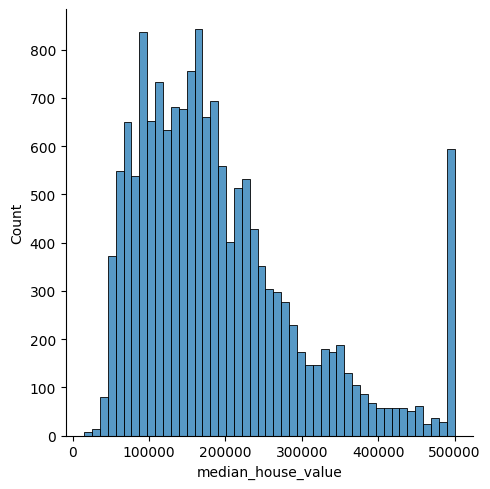

In [63]:
sns.displot(df.median_house_value)

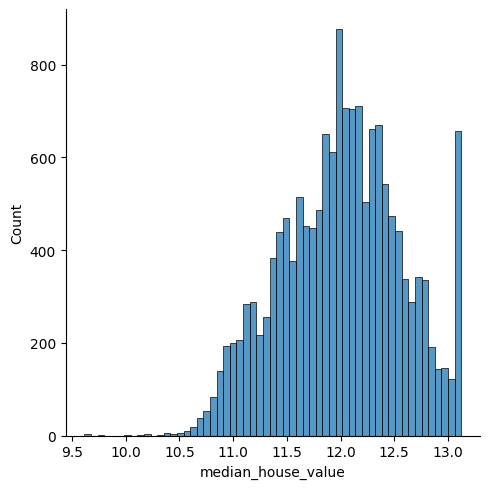

In [64]:
sns.displot(np.log1p(df.median_house_value))

In [77]:
#LR model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [95]:
#Split dataset:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Shuffle dataset and seed random:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [96]:
#Prepare data
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [97]:
#preparing labels
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [98]:
#delete target
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [99]:
check=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

#Filling nan values
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [100]:
#calculate RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [101]:
#Fillin missed values by mean
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [102]:
#Get the RMSE score
np.round(rmse(y_val, y_mean_pred_val),2)

0.34

In [103]:
# Preparing the dataset, fill None with zero 
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

# Calculate RMSE
np.round(rmse(y_val, y_null_pred_val),2)

0.34

### Regularization

In [104]:
# Training linear regression
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [107]:
# results best rmse in different regularization
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, 'RMSE: ',rmse_val)

0 -9.763249477087994 RMSE:  0.34
1e-06 -9.763228830944522 RMSE:  0.34
0.0001 -9.761185235519909 RMSE:  0.34
0.001 -9.74264624932257 RMSE:  0.34
0.01 -9.561056192964303 RMSE:  0.34
0.1 -8.058889769044265 RMSE:  0.34
1 -3.133154278380521 RMSE:  0.34
5 -0.8410867973986591 RMSE:  0.35
10 -0.43811723155807497 RMSE:  0.35


### Check the seed

In [109]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -9.870068971521839 0.34
1 -9.114011210205401 0.34
2 -9.911560200978796 0.34
3 -10.23318368170476 0.33
4 -9.174763449844203 0.34
5 -10.006648303379858 0.34
6 -10.039903099560465 0.34
7 -10.353545445362197 0.35
8 -9.899416167342178 0.35
9 -9.964622126421347 0.33


In [111]:
np.round(np.std(rmse_list),4)

0.0063

In [113]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [114]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.33